# Project 1 - Music Data Analysis
## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier


In [2]:
df = pd.read_csv('project_train.csv')
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Label
0,0.545,0.884,5,-4.807,0,0.367,0.290000,0.000000,0.370,0.641,86.049,1
1,0.795,0.545,7,-8.153,1,0.343,0.003960,0.000000,0.273,0.809,91.967,1
2,0.489,0.871,5,-5.825,1,0.386,0.002850,0.000004,0.130,0.341,117.431,1
3,0.539,0.931,4,-1.803,0,0.262,0.000713,0.000000,0.204,0.685,85.571,0
4,0.918,0.734,11,-2.832,0,0.269,0.029400,0.000008,0.191,0.608,97.044,1


## Data Preprocessing


In [7]:
# Standardise each column except the target column 'label' and store in df_stdrd
scaler = StandardScaler()
df_original = df.copy()
df.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Label
0,0.058730,-0.036834,-0.041095,0.058308,-1.416316,2.324818,-0.070761,-0.542589,0.786568,0.623956,-1.026042,1
1,1.388697,-0.047232,0.505039,0.046791,0.706057,2.112641,-0.844526,-0.542589,0.301769,1.250816,-0.809155,1
2,-0.239182,-0.037233,-0.041095,0.054804,0.706057,2.492791,-0.847529,-0.542578,-0.412937,-0.495437,0.124071,1
3,0.026811,-0.035392,-0.314162,0.068648,-1.416316,1.396545,-0.853310,-0.542589,-0.043089,0.788134,-1.043561,0
4,2.043041,-0.041435,1.597307,0.065106,-1.416316,1.458430,-0.775709,-0.542566,-0.108062,0.500823,-0.623089,1


## Data Exploration

In [8]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Label
count,5.050000e+02,5.050000e+02,5.050000e+02,505.000000,5.050000e+02,505.000000,5.050000e+02,505.000000,5.050000e+02,505.000000,505.000000,505.000000
mean,-1.407015e-17,-3.517538e-18,-1.758769e-17,0.000000,2.462277e-17,0.000000,-5.628061e-17,0.000000,-1.407015e-17,0.000000,0.000000,0.500990
std,1.000992e+00,1.000992e+00,1.000992e+00,1.000992,1.000992e+00,1.000992,1.000992e+00,1.000992,1.000992e+00,1.000992,1.000992,0.500495
min,-2.388941e+00,-6.364724e-02,-1.406430e+00,-22.443272,-1.416316e+00,-0.719918,-8.551737e-01,-0.542589,-9.507146e-01,-1.677516,-2.538613,0.000000
25%,-8.669267e-01,-5.075874e-02,-1.133363e+00,0.040970,-1.416316e+00,-0.600569,-8.008662e-01,-0.542589,-5.958610e-01,-0.883493,-0.801972,0.000000
50%,1.225687e-01,-4.143459e-02,-4.109523e-02,0.054711,7.060569e-01,-0.506857,-5.414476e-01,-0.542470,-3.929448e-01,0.000828,-0.033849,1.000000
75%,8.088317e-01,-3.710990e-02,7.781057e-01,0.059585,7.060569e-01,0.273776,7.515876e-01,-0.293811,2.617850e-01,0.840372,0.585003,1.000000
max,2.160078e+00,2.244898e+01,1.597307e+00,0.089762,7.060569e-01,7.257927,1.839036e+00,2.342889,3.895285e+00,1.847826,3.544176,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      505 non-null    float64
 1   energy            505 non-null    float64
 2   key               505 non-null    float64
 3   loudness          505 non-null    float64
 4   mode              505 non-null    float64
 5   speechiness       505 non-null    float64
 6   acousticness      505 non-null    float64
 7   instrumentalness  505 non-null    float64
 8   liveness          505 non-null    float64
 9   valence           505 non-null    float64
 10  tempo             505 non-null    float64
 11  Label             505 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 47.5 KB


<Axes: >

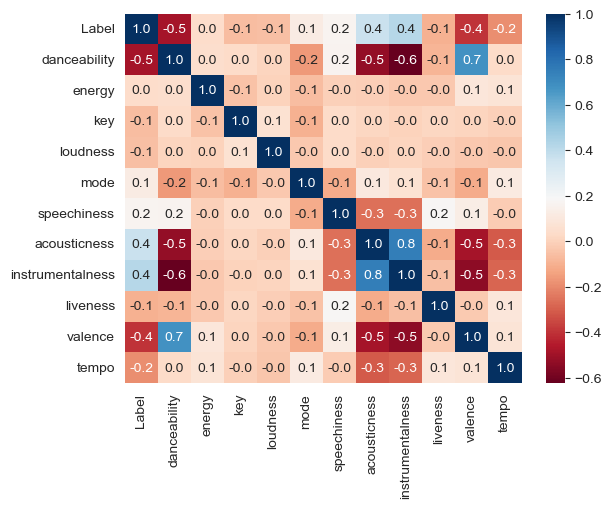

In [10]:
# Manual sorting of the columns
df = df[['Label', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]

# Correlation Matrix
matrix = df.corr()
sns.heatmap(matrix, annot=True, fmt=".1f", cmap='RdBu')


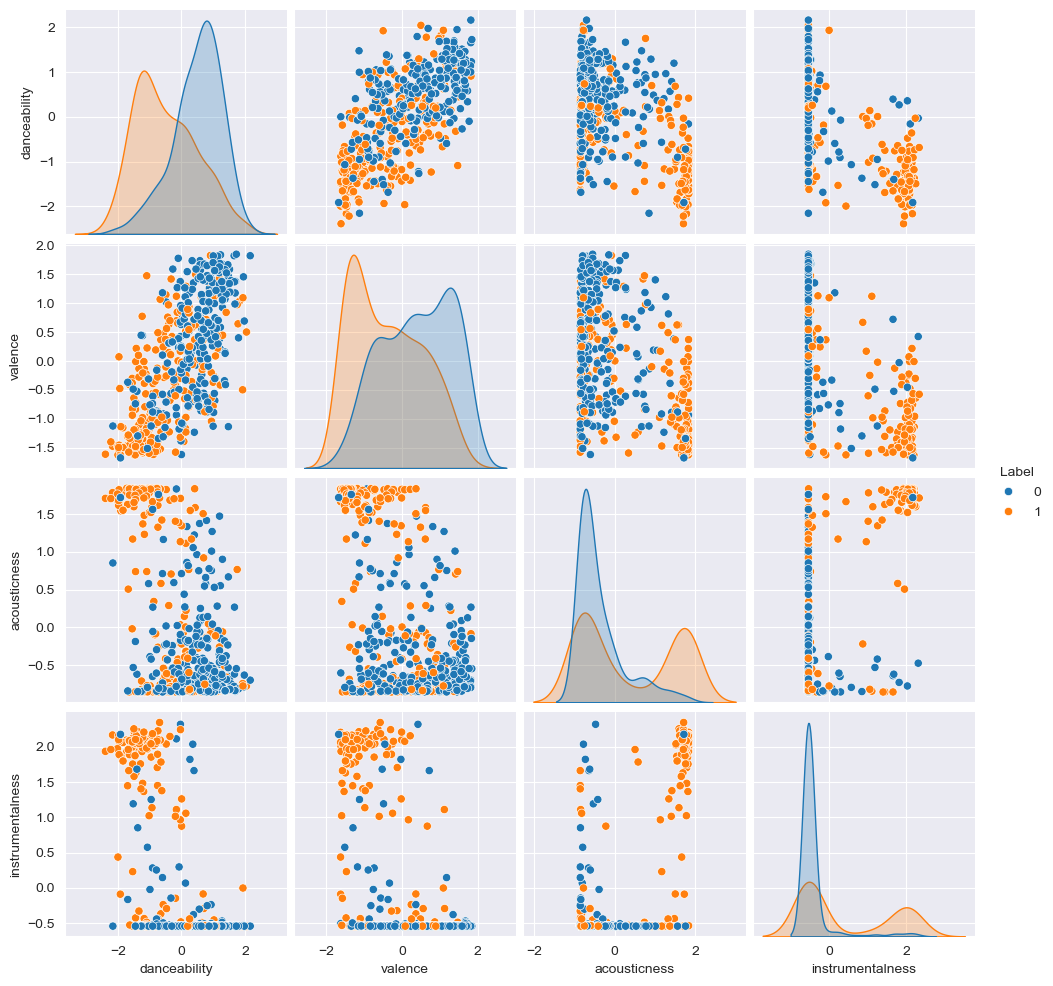

In [12]:
# Pairwise plot of relevant columns
selected_columns = ['danceability', 'valence', 'acousticness', 'instrumentalness', 'Label']

sns.pairplot(df[selected_columns], hue='Label', diag_kind='kde')
plt.show()


# Learning
In this section, we will do some light analysis on the various models right out of the box.

In [16]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

## Method: Random Forest Classifier

In [10]:
# Train the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
print('Train accuracy: ', clf.score(X_test, y_test))

Train accuracy:  0.8260869565217391


## Method: LightGBM Classifier (REMOVE, DO NOT INCLUDE)

In [11]:
# Train the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
lgbm = LGBMClassifier(n_estimators=20, learning_rate=0.1, verbose=-1)
lgbm.fit(X_train, y_train)
print('Train accuracy: ', lgbm.score(X_test, y_test))

Train accuracy:  0.7944664031620553


## Method: XGBoost Classifier

In [12]:
# Train the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
xgb = XGBClassifier(n_estimators=20, learning_rate=0.1, verbosity=0)
xgb.fit(X_train, y_train)
print('Train accuracy: ', xgb.score(X_test, y_test))

Train accuracy:  0.8260869565217391


## Method: Logistic Regression

In [13]:
# Train the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=0)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
print('Train accuracy: ', log_reg.score(X_test, y_test))

Train accuracy:  0.7953795379537953


## Method: Support Vector Machine

In [14]:
# Train the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
svm_model = svm.SVC(kernel='rbf')
svm_model.fit(X_train, y_train)
print('Train accuracy: ', svm_model.score(X_test, y_test))

Train accuracy:  0.841897233201581


## Method: Linear Discriminant Analysis

In [15]:
# Train the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Train accuracy: ', lda.score(X_test, y_test))

Train accuracy:  0.7747035573122529


## Method: Quadratic Discriminant Analysis

In [16]:
# Train the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=1)
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
print('Train accuracy: ', qda.score(X_test, y_test))

Train accuracy:  0.7277227722772277


## Method: Multilayer Perceptron (Neural Network)

In [17]:
# Train the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000)
mlp.fit(X_train, y_train)
print('Train accuracy: ', mlp.score(X_test, y_test))

Train accuracy:  0.7722772277227723


# Robust Function for Training and Testing using Cross Validation
In this we will perform rigorous testing on the models using cross validation


In [14]:
def train_and_test(X, y, model, doPCA=False):
    
    if doPCA:
        # Do PCA on the data using MLE to find the number of components
        pca = PCA(n_components='mle')
        pca.fit(X)
        X = pca.transform(X)
        print('Number of components: ', pca.n_components_)
    
    # Cross-validation
    kfold = KFold(n_splits=10, shuffle=True, random_state=2)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    print('Cross Validation Accuracy: ', cv_results.mean())
    
    # Confusion matrix
    y_pred = cross_val_predict(model, X, y, cv=kfold)
    conf_mat = confusion_matrix(y, y_pred)
    #print('Confusion Matrix: \n', conf_mat)
    
    # Classification report
    class_rep = classification_report(y, y_pred)
    #print('Classification Report: \n', class_rep)
    
    # Train the model
    model.fit(X, y)
    
    return model, cv_results



In [17]:


# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100)

# Logistic Regression
log_reg = LogisticRegression(solver='liblinear')

# Support Vector Machine
svm_model = svm.SVC(kernel='rbf')

# K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=10)

# Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis()

# Quadratic Discriminant Analysis
qda = QuadraticDiscriminantAnalysis()

# Neural Network
mlp = MLPClassifier(hidden_layer_sizes=(64, 32, 16), max_iter=1000)

# Train and test the models
models = {'rf': rf, 'log_reg': log_reg, 'svm_model': svm_model, 'knn_model': knn_model, 'lda': lda, 'qda': qda, 'mlp': mlp}

cv_results_list = []

for model_name, model in models.items():
    print('Model: ', model_name)
    _, cv_results = train_and_test(X, y, model, doPCA=False)
    cv_results_list.append(cv_results)
    
    print('\n')

Model:  rf
Cross Validation Accuracy:  0.8314509803921568


Model:  log_reg
Cross Validation Accuracy:  0.7762745098039215


Model:  svm_model
Cross Validation Accuracy:  0.803921568627451


Model:  knn_model
Cross Validation Accuracy:  0.786392156862745


Model:  lda
Cross Validation Accuracy:  0.7802352941176471


Model:  qda
Cross Validation Accuracy:  0.6752156862745098


Model:  mlp
Cross Validation Accuracy:  0.8038823529411765




In [ ]:
cv_results_list

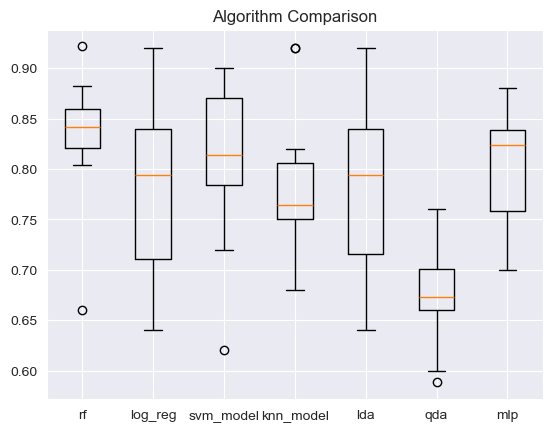

In [18]:
# Show score on histogram
plt.boxplot(cv_results_list, labels=models.keys())
plt.title('Algorithm Comparison')
plt.show()

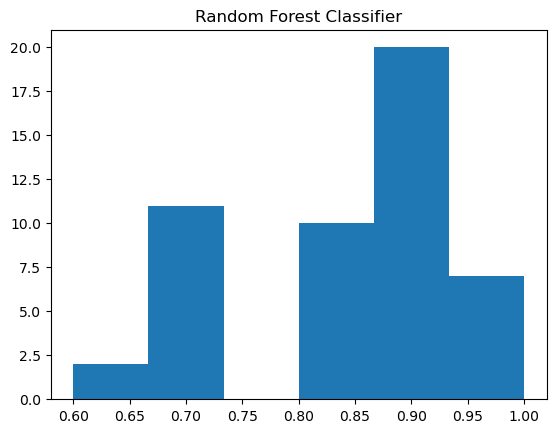

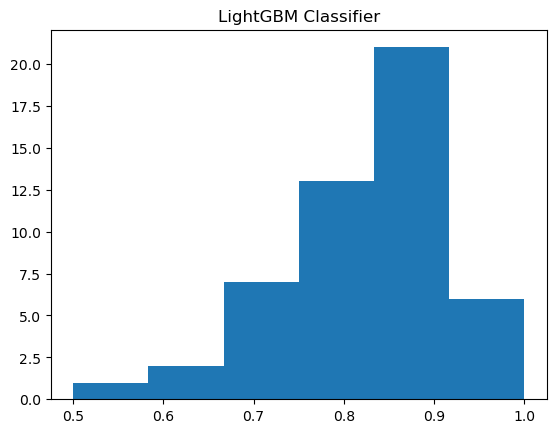

In [343]:
# Show score on plt.hist for rf and lgbm in their own plots but use subplots

plt.hist(cv_results_list[0], bins=6)
plt.title('Random Forest Classifier')
plt.show()

plt.hist(cv_results_list[1], bins=6)
plt.title('LightGBM Classifier')
plt.show()

# Refining the Models by tuning the hyperparameters
In this section, we will refine the models by tuning the hyperparameters using GridSearchCV

In [31]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

# Take the best models and perform GridSearchCV
# Random Forest Classifier
rf = RandomForestClassifier()
rf_pg = {'n_estimators': [120, 140, 160, 190, 210, 240],
         'max_depth': [100, None],
         'min_samples_split': [2, 4]}

# MLP
mlp = MLPClassifier(activation='relu')
mlp_pg = {  'max_iter': [200, 400, 1200],
            'alpha': [0.1],
            'hidden_layer_sizes':  [(16, 16, 8, 8), (64, 32, 16), (32, 16, 8), (8, 8, 8)]}

# Support Vector Machine
svm_model = svm.SVC()
svm_model_pg = {'C': [4, 6, 8, 10, 100],
          'gamma': [0.1, 0.01, 0.001],
          'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}

# Train and test the models
models = {'rf': rf, 'mlp': mlp, 'svm_model': svm_model}

best_params = {}

for model_name, model in models.items():
    print('Model: ', model_name)
    grid = GridSearchCV(model, eval(model_name+'_pg'), cv=10)
    grid.fit(X_train, y_train)
    print('Best parameters: ', grid.best_params_)
    print('Best score: ', grid.best_score_)
    # Evaluate the model on test data
    print('Test accuracy: ', grid.score(X_test, y_test))
    print('\n')
    best_params[model_name] = grid.best_params_



Model:  rf
Best parameters:  {'max_depth': 100, 'min_samples_split': 2, 'n_estimators': 160}
Best score:  0.8491463414634147
Test accuracy:  0.8613861386138614


Model:  mlp


C:\Users\noely\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\noely\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\noely\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\noely\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\noely\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

Best parameters:  {'alpha': 0.1, 'hidden_layer_sizes': (32, 16, 8), 'max_iter': 200}
Best score:  0.786829268292683
Test accuracy:  0.8118811881188119


Model:  svm_model
Best parameters:  {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best score:  0.7895731707317074
Test accuracy:  0.8514851485148515




In [24]:
"""best_params['mlp']['max_iter'] = 1200
best_params['mlp']['batch_size'] = 200
"""

iterations = 100
model_performance_training = np.zeros((iterations, 3))
model_performance_test = np.zeros((iterations, 3))

for i in range(iterations):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    rf_model = RandomForestClassifier(**best_params['rf'])
    svm_model = svm.SVC(**best_params['svm_model'])
    mlp_model = MLPClassifier(**best_params['mlp'])
    
    # Train the models
    rf_model, cv_result_rf = train_and_test(X_train, y_train, rf_model, doPCA=False)
    svm_model, cv_results_svm = train_and_test(X_train, y_train, svm_model, doPCA=False)
    mlp_model, cv_result_mlp = train_and_test(X_train, y_train, mlp_model, doPCA=False)
    
    # Fit the models
    rf_model.fit(X_train, y_train)
    svm_model.fit(X_train, y_train)
    mlp_model.fit(X_train, y_train)
    
    # Store the model performances on trainining
    model_performance_training[i, 0] = cv_result_rf.mean()
    model_performance_training[i, 1] = cv_results_svm.mean()
    model_performance_training[i, 2] = cv_result_mlp.mean()
    
    # Store the model performances on testing
    model_performance_test[i, 0] = rf_model.score(X_test, y_test)
    model_performance_test[i, 1] = svm_model.score(X_test, y_test)
    model_performance_test[i, 2] = mlp_model.score(X_test, y_test)
    
# Print the mean and standard deviation of the model performances on training in boxplot
plt.boxplot(model_performance_training, labels=['rf', 'svm', 'mlp'])
plt.title('Algorithm Comparison using CV results')
plt.show()
    
# Print the mean and standard deviation of the model performances in boxplot
plt.boxplot(model_performance_test, labels=['rf', 'svm', 'mlp'])
plt.title('Algorithm Comparison on test set')
plt.show()
    


KeyError: 'rf'

## Predicting the Final Data

In [191]:
# Import the data to be predicted
X_predict = pd.read_csv('filler')
# Standardise the data
X_predict.iloc[:, :] = scaler.transform(X_predict.iloc[:, :])

# Predict using rf
y_predict = rf.predict(X_predict)

# Save the prediction to a csv file
y_predict.to_csv('prediction.csv')


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.543,0.752,0,-9.986,1,0.1010,0.0224,0.000000,0.0683,0.904,168.122
1,0.483,0.753,1,-8.937,0,0.0832,0.4250,0.000142,0.2570,0.420,115.102
2,0.541,0.618,1,-9.652,0,0.1790,0.2770,0.000040,0.4130,0.680,145.464
3,0.539,0.884,9,-6.530,1,0.0403,0.3820,0.001660,0.7600,0.752,100.812
4,0.205,0.129,7,-18.197,1,0.0595,0.9680,0.946000,0.1010,0.296,136.871
